<style>
    /* 整个头部容器的样式，让所有内容居中 */
    .report-header {
        text-align: center;
        margin-bottom: 40px;
    }
    /* --- 最终版：完整网格边框表格样式 --- */
    .info-table-grid {
        border-collapse: collapse; 
        width: 65%;
        margin: 25px auto;
        border: 1px solid #ccc; 
    }
    .info-table-grid th, .info-table-grid td {
        border: 1px solid #ccc; 
        padding: 12px 15px;
        font-family: 'SimSun', '宋体', serif;
        font-size: 14px;
        vertical-align: middle;
    }
    .info-table-grid th {
        font-weight: bold; /* 标题使用标准粗体 (相当于font-weight: 700) */
        text-align: center;
        background-color: #003A70; 
        color: white; 
    }
    .info-table-grid td {
        text-align: left;
        color: #000000;
        font-weight: 600; /* <-- 核心改动：将内容字体设置为“半粗体”，使其更清晰 */
    }
</style>

<div class="report-header">
    <table class="info-table-grid">
        <tr>
            <th>实验名称</th>
            <td>PyTorch基本操作实验</td>
        </tr>
        <tr>
            <th>姓&emsp;&emsp;名</th>
            <td>张雨欣</td>
        </tr>
        <tr>
            <th>学&emsp;&emsp;号</th>
            <td>25121507</td>
        </tr>
        <tr>
            <th>学&emsp;&emsp;院</th>
            <td>数学与统计学院</td>
        </tr>
        <tr>
            <th>上课类型</th>
            <td>平台课</td>
        </tr>
        <tr>
            <th>日&emsp;&emsp;期</th>
            <td>2025年7月18日</td>
        </tr>
    </table>
</div>

<style>
    /* 整个头部容器的样式，让所有内容居中 */
    .report-header {
        text-align: center;
        margin-bottom: 40px;
    }
    /* --- 最终版：完整网格边框表格样式 --- */
    .info-table-grid {
        border-collapse: collapse; /* 让边框合并为单一边框 */
        width: 65%;
        margin: 25px auto;
        border: 1px solid #ccc; /* 添加一个外层边框 */
    }
    .info-table-grid th, .info-table-grid td {
        border: 1px solid #ccc; /* <-- 核心改动：为所有单元格添加清晰的灰色边框 */
        padding: 12px 15px;
        font-family: 'SimSun', '宋体', serif;
        font-size: 14px;
        vertical-align: middle;
    }
    .info-table-grid th {
        font-weight: bold;
        text-align: center;
        background-color: #003A70; /* 保留“交大蓝”背景色 */
        color: white; /* 白色文字 */
    }
    .info-table-grid td {
        text-align: left;
        color: #000000;
    }
</style>

## 一、实验内容

<p style="text-indent: 2em;">本次实验主要围绕PyTorch深度学习框架的基础操作以及两种经典的回归模型展开。要求使用两种方法分别实现回归模型，包括从零开始动手构造和使用`torch.nn`模块的高级API实现方式，实验所用的算法原理主要包括：</p>

1.  **PyTorch张量运算与广播机制**
2.  **自动求导机制**
3.  **Logistic回归**：用于解决二分类问题的线性模型
4.  **Softmax回归**：Logistic回归在多分类问题上的推广
5.  **损失函数**

## 二、实验设计

（本实验内容皆为指定内容，省略该部分）

## 三、实验环境及实验数据集

#### 实验环境

In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import platform
from sklearn.model_selection import train_test_split
from torchmetrics import Accuracy, Precision, Recall, F1Score, ConfusionMatrix, MetricCollection


print("OS:", platform.system(), platform.release())
print("Python Version:", platform.python_version())
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)

OS: Darwin 24.4.0
Python Version: 3.10.11
PyTorch Version: 2.7.1
Torchvision Version: 0.22.1


#### 实验数据集
1.  **人工构造数据集**：用于Logistic回归。此数据集包含两个类别，数据点呈线性可分或近似线性可分。
2.  **Fashion-MNIST数据集**：用于Softmax回归。这是一个包含10个类别（T-shirt/top, Trouser, Pullover等）的灰度图像数据集。

## 四、实验过程与结果分析

### 4.1 PyTorch基本操作实验

**题目 1.1.1：使用Tensor初始化一个$1 \times 3$的矩阵M和一个$2 \times 1$的矩阵N，对两矩阵进行减法操作（要求实现三种不同的形式），给出结果并分析三种方式的不同（如果出现报错，分析报错的原因），同时需要指出在计算过程中发生了什么？**

In [2]:
import torch
torch.manual_seed(42) #设置seed=42，保证实验结果可复现

M = torch.randn(1, 3)
N = torch.randn(2, 1)
print(f"矩阵M: {M}，形状: {M.shape}")
print(f"\n矩阵N: {N}，形状: {N.shape}")

# 方式一，直接使用减法运算符
print(f"\n方法一:M - N = {M - N},形状：{(M-N).shape}")

# 方式二，使用torch.sub函数
print(f"\n方法二:torch.sub(M, N) = {torch.sub(M, N)},形状：{torch.sub(M, N).shape}")

# 方式三，使用sub_()原地减法方法，此方法会报错
#使用 try-except 来捕获并分析错误
try:
    M_copy = M.clone()  # 克隆M以避免修改原始张量
    M_copy.sub_(N)
except RuntimeError as e:
    print("\n方法三:M.sub_(N) 发生了报错:")
    print(e)

矩阵M: tensor([[0.3367, 0.1288, 0.2345]])，形状: torch.Size([1, 3])

矩阵N: tensor([[ 0.2303],
        [-1.1229]])，形状: torch.Size([2, 1])

方法一:M - N = tensor([[ 0.1064, -0.1015,  0.0041],
        [ 1.4595,  1.2517,  1.3573]]),形状：torch.Size([2, 3])

方法二:torch.sub(M, N) = tensor([[ 0.1064, -0.1015,  0.0041],
        [ 1.4595,  1.2517,  1.3573]]),形状：torch.Size([2, 3])

方法三:M.sub_(N) 发生了报错:
output with shape [1, 3] doesn't match the broadcast shape [2, 3]


**结果分析**

1.  **方法一：使用减法运算符 (`-`)**
    通过减法运算符 `-` 进行计算，由于 PyTorch 的**广播机制**，在运算时，PyTorch 会自动扩展 `M` 和 `N` 的维度，使它们具有一个共同的形状。

    *   **矩阵 M** (原始形状 `1x3`) 被广播为 `2x3` 的形状：
        ```
        [[ -1.2061,  0.0617,  1.1632],
         [ -1.2061,  0.0617,  1.1632]]
        ```
    *  **矩阵 N** (原始形状 `2x1`) 被广播为 `2x3` 的形状：
        ```
        [[ -1.5008, -1.5008, -1.5008],
         [ -1.5944, -1.5944, -1.5944]]
        ```
    最后，对这两个广播后的 `2x3` 矩阵进行逐元素减法，得到最终结果。

2.  **方法二：使用 `torch.sub()` 函数**
    此函数与直接使用减法运算符 `-` 的效果完全相同，计算过程与方法一完全一致。

3.  **方法三：使用原地操作 `sub_()`**
    这个方法会**报错**。原因是原地操作如 `sub_()` 有一个严格的限制：**它不能改变张量的形状**。由于广播后的结果形状是 `2x3`，而矩阵 `M` 的原始形状是 `1x3`。形状不匹配，因此操作失败。


**题目 1.1.2：利用Tensor创建两个大小分别为$3 \times 2$和$4 \times 2$的随机数矩阵P和Q，要求服从均值为0，标准差为0.01的正态分布；对第二步得到的矩阵Q进行形状变换得到$Q'$的转置$Q^T$；对上述得到的矩阵P和矩阵$Q'$做矩阵乘法。**

In [3]:
import torch
torch.manual_seed(20) #设置seed=20，保证实验结果可复现

P=torch.normal(0,0.01,(3,2))
Q=torch.normal(0,0.01,(4,2))
print(f"矩阵P: {P}，形状: {P.shape}")
print(f"\n矩阵Q: {Q}，形状: {Q.shape}")
print(f"\n矩阵Q的转置: {Q.T}，形状: {Q.T.shape}")

print(f"\n矩阵乘法的结果: {torch.matmul(P, Q.T)},形状：{torch.matmul(P, Q.T).shape}")


矩阵P: tensor([[-0.0121,  0.0006],
        [ 0.0116, -0.0150],
        [-0.0159, -0.0002]])，形状: torch.Size([3, 2])

矩阵Q: tensor([[-2.1325e-02, -5.2700e-03],
        [-1.0210e-03,  9.9089e-05],
        [-4.4544e-03, -1.4976e-02],
        [-9.4748e-03, -6.1304e-03]])，形状: torch.Size([4, 2])

矩阵Q的转置: tensor([[-2.1325e-02, -1.0210e-03, -4.4544e-03, -9.4748e-03],
        [-5.2700e-03,  9.9089e-05, -1.4976e-02, -6.1304e-03]])，形状: torch.Size([2, 4])

矩阵乘法的结果: tensor([[ 2.5394e-04,  1.2375e-05,  4.4487e-05,  1.1049e-04],
        [-1.6895e-04, -1.3362e-05,  1.7295e-04, -1.8199e-05],
        [ 3.4099e-04,  1.6260e-05,  7.3823e-05,  1.5221e-04]]),形状：torch.Size([3, 4])


**题目 1.1.3：给定公式 $y_3 = y_1 + y_2 = x^2 + x^3$，且 $x=1$。利用学习到的Tensor的相关知识，求$y_3$对$x$的梯度$\frac{dy_3}{dx}$。要求在计算$x^2$时中断梯度的追踪，观察结果并进行原因分析。**

In [4]:
import torch

x = torch.tensor(1.0, requires_grad=True)
y1 = (x ** 2).detach() # 中断梯度计算
y2 = x ** 3
y3 = y1 + y2
y3.backward() # 反向传播，计算梯度

print(f"输入值: x = {x.item()}")
print(f"\n中断 x^2 梯度追踪后, dy3/dx = {x.grad.item()}")


输入值: x = 1.0

中断 x^2 梯度追踪后, dy3/dx = 3.0


**结果分析**

在 PyTorch 的反向传播过程中，梯度会从输出（`y3`）流向输入（`x`），存在两条并行的梯度路径：

*   **路径 1**：`y3` → `y1` → `x`，对应于 $y_1 = x^2$ 这一部分。
*   **路径 2**：`y3` → `y2` → `x`，对应于 $y_2 = x^3$ 这一部分。

然而，由于我们在计算 $y_1=x^2$ 时**中断了梯度追踪**，则**路径 1** 被切断了。中断梯度追踪有两种方法：`detach()`, `with torch.no_grad()`。
因此，梯度无法从 `y1` 流向 `x`。

最终，只有**路径 2** 的梯度能够成功地传播回 `x`。这部分的梯度计算如下：

$$ \frac{dy_3}{dx} = \frac{d(y_1)}{dx} + \frac{d(y_2)}{dx} = 0 + \frac{d(x^3)}{dx} = 3x^2 $$

将 $x=1$ 代入上式，我们得到最终结果为3。
 

### 4.2 Logistic 回归实验

**题目 1：要求动手从0实现 logistic 回归（只借助Tensor和Numpy相关的库）在人工构造的数据集上进行训练和测试，并从loss、训练集上的准确率等多个角度对结果进行分析。**

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
### 1. 准备数据-------------------------------------------

# 人工构造数据集
n_data = torch.ones(50, 2) 
x1 = torch.normal(2 * n_data, 1) 
y1 = torch.zeros(50) 
x2 = torch.normal(-2 * n_data, 1) 
y2 = torch.ones(50) 

# 合并数据并转换数据类型
X = torch.cat((x1, x2), 0).type(torch.FloatTensor) 
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)


In [7]:
# 查看X与y的前五个数据
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
tensor([[2.0709, 0.2909],
        [2.1217, 1.7621],
        [0.0743, 1.7692],
        [2.5533, 1.7326],
        [3.1124, 2.2351]])

First 5 y labels:
tensor([0., 0., 0., 0., 0.])


In [8]:
# 查看X1、X2的前五个数据，并统计标签次数
import pandas as pd
data = pd.DataFrame({"X1": X[:, 0],"X2": X[:, 1], "label": y}) 
data.head(),data.label.value_counts()

(         X1        X2  label
 0  2.070938  0.290928    0.0
 1  2.121714  1.762119    0.0
 2  0.074302  1.769169    0.0
 3  2.553262  1.732611    0.0
 4  3.112357  2.235108    0.0,
 label
 0.0    50
 1.0    50
 Name: count, dtype: int64)

Text(0, 0.5, 'X2')

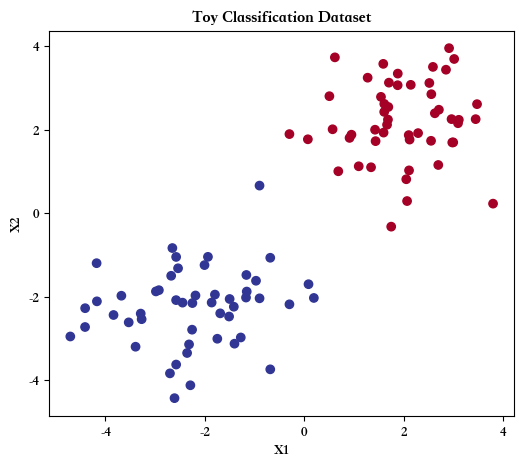

In [9]:
# 将构造的数据可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu, label='class')
plt.title("Toy Classification Dataset")
plt.xlabel("X1")
plt.ylabel("X2")

In [10]:
# 划分数据集
#将20%的数据划分给测试集，同时保证结果的可复现性
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,test_size=0.2,random_state=42) 
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [11]:
### 2. 构建模型-------------------------------------------

# 设置运行设备：‘mps’
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Using device: {device}")

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

Using device: mps


In [12]:
# 定义评价函数：准确率，F1分数
def accuracy(pred, target): #定义准确率函数
    # 将概率转换为标签，然后用 squeeze() 移除多余的维度
    pred_label = (pred >= 0.5).float().squeeze() 
    return (pred_label == target).float().mean().item()

def f1_score(pred, target): #定义F1分数函数
    # 同样，用 squeeze() 来对齐形状
    pred_label = (pred >= 0.5).float().squeeze() 
    
    # 确保 target 也是 float 类型以进行比较
    target = target.float()

    TP = ((pred_label == 1) & (target == 1)).float().sum()
    FP = ((pred_label == 1) & (target == 0)).float().sum()
    FN = ((pred_label == 0) & (target == 1)).float().sum()
    
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    return f1.item()

In [13]:
# 创建一个简单的、单层的逻辑回归模型
# 输入 -> 线性变换 (Wx+b) -> Sigmoid激活 -> 输出
class LogisticRegression: # 定义逻辑回归模型
    def __init__(self,device):
        self.W = torch.randn(2, 1, requires_grad=True,device=device)
        self.b = torch.zeros(1, requires_grad=True,device=device)

    def forward(self, x): # 前向传播函数
        x=x.to(self.W.device) 
        return torch.matmul(x, self.W) + self.b
    def __repr__(self):
        return f"LogisticRegression(\n  (weight): Parameter with shape {self.W.shape}\n  (bias): Parameter with shape {self.b.shape}\n)"

torch.manual_seed(42)
model_0 = LogisticRegression(device=device) #创建实例
model_0


LogisticRegression(
  (weight): Parameter with shape torch.Size([2, 1])
  (bias): Parameter with shape torch.Size([1])
)

In [14]:
###----3. 训练模型-----------------------------------
epochs = 500
lr=0.5

epoch_count = []
train_loss_values = []
test_loss_values = []
test_acc_values = []
test_f1_values = []


X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### 训练阶段
    
    # 1. 前向传播
    y_logits = model_0.forward(X_train) 

    # 2. 计算损失
    y_pred_probs_train = torch.sigmoid(y_logits)
    epsilon = 1e-8
    loss_per_sample = -(y_train.view_as(y_logits) * torch.log(y_pred_probs_train + epsilon) + \
                       (1 - y_train.view_as(y_logits)) * torch.log(1 - y_pred_probs_train + epsilon))
    loss = loss_per_sample.mean()

    # 3. 反向传播：计算梯度
    if model_0.W.grad is not None:
        model_0.W.grad.zero_()
    if model_0.b.grad is not None:
        model_0.b.grad.zero_()
    loss.backward()

    # 4. 更新参数：手动执行梯度下降
    with torch.no_grad():
        # W = W - lr* W_gradient
        model_0.W -= lr * model_0.W.grad
        model_0.b -= lr * model_0.b.grad

    ### 测试阶段
    
    with torch.no_grad(): 
        # 1. 前向传播
        test_logits = model_0.forward(X_test)
    
        # 2. 计算损失和评估指标
        test_pred_probs = torch.sigmoid(test_logits)
        epsilon = 1e-8 
        test_loss_per_sample = -(y_test.view_as(test_logits) * torch.log(test_pred_probs + epsilon) + \
                                (1 - y_test.view_as(test_logits)) * torch.log(1 - test_pred_probs + epsilon))
        test_loss = test_loss_per_sample.mean()
        test_acc = accuracy(test_pred_probs, y_test)
        test_f1 = f1_score(test_pred_probs, y_test)
       

    ### 记录数据 
    epoch_count.append(epoch)
    train_loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())
    test_acc_values.append(test_acc)
    test_f1_values.append(test_f1)

    ### 打印阶段 
    if (epoch + 1) % 50 == 0: # 每50轮打印一次
        print(f"Epoch: {epoch+1:4d} | "
              f"Train Loss: {loss:.5f} | "
              f"Test Loss: {test_loss:.5f} | "
              f"Test Acc: {test_acc:.4f} | "
              f"Test F1: {test_f1:.4f}")

Epoch:   50 | Train Loss: 0.01885 | Test Loss: 0.02009 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  100 | Train Loss: 0.01331 | Test Loss: 0.01328 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  150 | Train Loss: 0.01076 | Test Loss: 0.01015 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  200 | Train Loss: 0.00916 | Test Loss: 0.00824 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  250 | Train Loss: 0.00803 | Test Loss: 0.00693 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  300 | Train Loss: 0.00718 | Test Loss: 0.00597 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  350 | Train Loss: 0.00651 | Test Loss: 0.00522 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  400 | Train Loss: 0.00597 | Test Loss: 0.00463 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  450 | Train Loss: 0.00552 | Test Loss: 0.00415 | Test Acc: 1.0000 | Test F1: 1.0000
Epoch:  500 | Train Loss: 0.00515 | Test Loss: 0.00376 | Test Acc: 1.0000 | Test F1: 1.0000


In [15]:
###----4. 预测和评估模型----------------------------------

with torch.no_grad():
    y_preds = torch.round(torch.sigmoid(model_0.forward(X_test))).squeeze()

# 打印前10个预测值和真实值进行对比
print(f"Predictions: {y_preds[:10]}")
print(f"Truth labels: {y_test[:10]}")

Predictions: tensor([1., 1., 1., 0., 0., 0., 0., 1., 0., 0.], device='mps:0')
Truth labels: tensor([1., 1., 1., 0., 0., 0., 0., 1., 0., 0.], device='mps:0')


In [16]:
# 定义绘制决策边界的辅助函数 
def plot_decision_boundary(model, X, y):
    X, y = X.to("cpu"), y.to("cpu")
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    X_to_pred_on = torch.from_numpy(np.vstack((xx.ravel(), yy.ravel())).T).float().to(device)
    
    # 将模型切换到评估模式
    model_0.W.requires_grad_(False)
    model_0.b.requires_grad_(False)
    
    # 得到原始 logits
    y_logits = model.forward(X_to_pred_on)
    # 将 logits 转换为概率
    y_pred_probs = torch.sigmoid(y_logits)
    
    # 将概率转换为 0/1 标签用于填充背景
    y_pred_labels = torch.round(y_pred_probs).squeeze()
    y_pred_labels = y_pred_labels.reshape(xx.shape).cpu().numpy()
    
    # 将模型切换回训练模式
    model_0.W.requires_grad_(True)
    model_0.b.requires_grad_(True)
    
    # 绘制填充背景 
    plt.contourf(xx, yy, y_pred_labels, cmap=plt.cm.RdYlBu, alpha=0.7)
    
    # 绘制明确的决策边界线
    y_pred_probs_reshaped = y_pred_probs.reshape(xx.shape).cpu().numpy()
    plt.contour(xx, yy, y_pred_probs_reshaped, levels=[0.5], colors='black', linewidths=2)
    
    # 绘制原始数据点 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

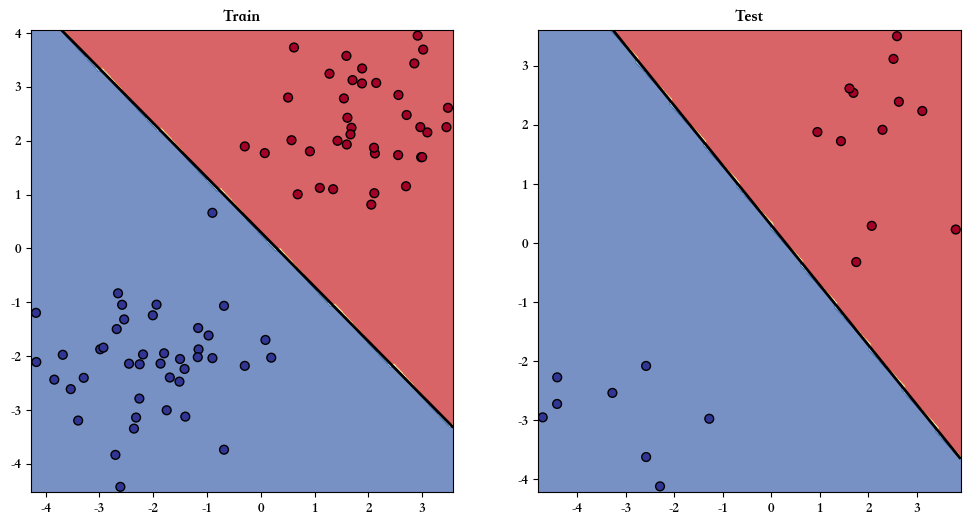

In [17]:
# 可视化训练结果与测试结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


plt.show()

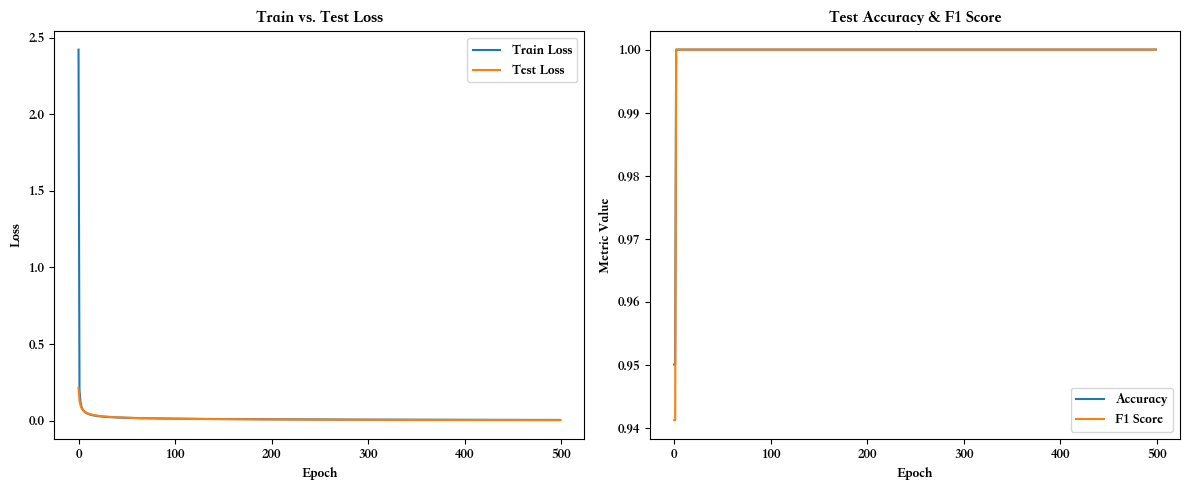

In [18]:
plt.figure(figsize=(12, 5))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Train vs. Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# 绘制准确率和F1分数曲线
plt.subplot(1, 2, 2)
plt.plot(epoch_count, test_acc_values, label="Accuracy")
plt.plot(epoch_count, test_f1_values, label="F1 Score")
plt.title("Test Accuracy & F1 Score")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()

plt.tight_layout() # 调整子图布局
plt.show()

**结果分析**

构建了一个简单的、单层的逻辑回归模型，包含输入 -> 线性变换 (Wx+b) -> Sigmoid激活 -> 输出。回归模型的训练结果表现得**极为出色**。

 **1. 决策边界分析**

- 具有最优线性边界，准确性高，泛化能力强。训练集和测试集上的所有数据点都被正确地划分到了其所属的类别区域内，没有出现错误分类的情况。且两者的决策边界极为相似，表明模型学习到的规律能够很好地应用于未见过的新数据。

**2. 损失函数分析**

- 收敛性极佳，无过拟合现象。从“Train vs. Test Loss”图可以看出，训练损失和测试损失都逐渐下降，并最终收敛到非常接近0的水平，模型没有在训练集上发生过拟合。

**3. 评估指标分析**

- 收敛迅速，准确率高。准确率为1.0意味着所有测试样本的类别都被预测正确。F1分数为1.0意味着模型的精确率和召回率达到了100%，即没有产生任何假正例或假反例。模型收敛得非常快。

**题目 2：利用torch.nn实现logistic回归在人工构造的数据集上进行训练和测试，并从loss、训练集上的准确率等多个角度对结果进行分析。**

In [19]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchmetrics import Accuracy, Precision, Recall, F1Score, ConfusionMatrix, MetricCollection
import seaborn as sns
import pandas as pd

In [20]:
### ----1. 准备数据-------------------------------------------

# 人工构造数据集
n_data = torch.ones(50, 2) 
x1 = torch.normal(2 * n_data, 1) # shape=(50, 2) 
y1 = torch.zeros(50) # 类型0 shape=(50, 1) 
x2 = torch.normal(-2 * n_data, 1) # shape=(50, 2) 
y2 = torch.ones(50) # 类型1 shape=(50, 1)

# 合并数据并转换数据类型
X = torch.cat((x1, x2), 0).type(torch.FloatTensor) 
y = torch.cat((y1, y2), 0).long().unsqueeze(1)


In [21]:
# 查看X与y的前五个数据
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
tensor([[ 3.9269,  3.4873],
        [ 2.9007, -0.1055],
        [ 2.6784,  0.7655],
        [ 1.9569,  0.3953],
        [ 1.2479,  3.6487]])

First 5 y labels:
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


In [22]:
# 查看X1、X2的前五个数据，并统计标签次数
data = pd.DataFrame({"X1": X[:, 0],"X2": X[:, 1], "label": y.squeeze()})
data.head(),data.label.value_counts()

(         X1        X2  label
 0  3.926915  3.487284      0
 1  2.900717 -0.105521      0
 2  2.678418  0.765455      0
 3  1.956933  0.395333      0
 4  1.247864  3.648723      0,
 label
 0    50
 1    50
 Name: count, dtype: int64)

Text(0, 0.5, 'X2')

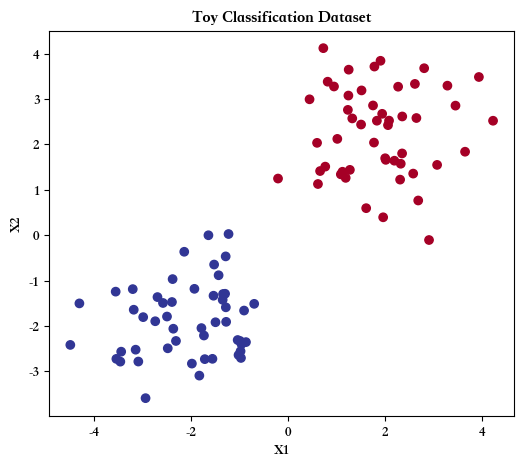

In [23]:
# 将构造的数据可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y.squeeze(), cmap=plt.cm.RdYlBu, label='class')
plt.title("Toy Classification Dataset")
plt.xlabel("X1")
plt.ylabel("X2")

In [24]:
# 划分数据集
#将20%的数据划分给测试集，同时保证结果的可复现性
X_train, X_test, y_train, y_test = train_test_split(X,  y,test_size=0.2,random_state=42) 
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [25]:
### ----2. 构建模型-------------------------------------------

# 设置运行设备：‘mps’
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Using device: {device}")

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
y_train_float = y_train.float()
y_test_float = y_test.float()

Using device: mps


In [ ]:
# 利用nn.Module 构造一个逻辑回归模型，输入2个特征，输出1个logit值
class LogisticRegressionV1(nn.Module): # 定义逻辑回归模型
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=2, out_features=1)

    def forward(self, x):
        return self.linear(x) 

torch.manual_seed(42)
model_1 = LogisticRegressionV1().to(device)
model_1
model_1.state.dict()  # 查看模型参数

LogisticRegressionV1(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [27]:
###----3. 训练模型-----------------------------------

# 创建损失函数实例 
loss_fn = nn.BCEWithLogitsLoss() 

#  创建优化器实例
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

# 创建评估指标
metrics = MetricCollection({
    'accuracy': Accuracy(task='binary'),
    'precision': Precision(task='binary'),
    'recall': Recall(task='binary'),
    'f1score': F1Score(task='binary')
}).to(device)
confmat_metric = ConfusionMatrix(task='binary', num_classes=2).to(device)


epochs = 200
epoch_count = []
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
train_precision_values = []
test_precision_values = []
train_recall_values = []
test_recall_values = []
train_f1_values = []
test_f1_values = []


for epoch in range(epochs):
    ### 训练阶段
    
    model_1.train()
    # 1. 前向传播
    y_logits = model_1(X_train)
    loss = loss_fn(y_logits, y_train_float)

    # 2. 计算损失
    y_pred = torch.round(torch.sigmoid(y_logits)).long() 
    train_metrics_results = metrics(y_pred, y_train) 
    
    train_acc = train_metrics_results['accuracy']
    train_precision = train_metrics_results['precision']
    train_recall = train_metrics_results['recall']
    train_f1 = train_metrics_results['f1score']
    
    # 3. 优化器零化梯度
    optimizer.zero_grad()

    # 4. 损失值反向传播
    loss.backward()

    # 5. 优化器更新参数
    optimizer.step()

    ### 测试阶段
    
    model_1.eval()
    with torch.inference_mode():
        # 1. 前向传播
        test_logits = model_1(X_test)
        test_loss = loss_fn(test_logits, y_test_float)
        
        # 2. 计算损失与准确率
        test_pred = torch.round(torch.sigmoid(test_logits)).long() 
        test_metrics_results = metrics(test_pred, y_test)        
        
        test_acc = test_metrics_results['accuracy']
        test_precision = test_metrics_results['precision']
        test_recall = test_metrics_results['recall']
        test_f1 = test_metrics_results['f1score']
        test_confmat = confmat_metric(test_pred, y_test)
        
    ### 记录数据
    epoch_count.append(epoch)
    train_loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())
    
    train_acc_values.append(train_acc.item())
    train_precision_values.append(train_precision.item())
    train_recall_values.append(train_recall.item())
    train_f1_values.append(train_f1.item())
    
    test_acc_values.append(test_acc.item())
    test_precision_values.append(test_precision.item())
    test_recall_values.append(test_recall.item())
    test_f1_values.append(test_f1.item())

    ### 打印阶段 
    if (epoch + 1) % 20 == 0: # 每20轮打印一次
        print(f"--- Epoch: {epoch+1:4d} ---")
        print(f"  [Train] Loss: {loss:.4f} | Acc: {train_acc:.4f} | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1: {train_f1:.4f}")
        print(f"  [Test]  Loss: {test_loss:.4f} | Acc: {test_acc:.4f} | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1: {test_f1:.4f}")


--- Epoch:   20 ---
  [Train] Loss: 0.1178 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
  [Test]  Loss: 0.0853 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
--- Epoch:   40 ---
  [Train] Loss: 0.0615 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
  [Test]  Loss: 0.0460 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
--- Epoch:   60 ---
  [Train] Loss: 0.0430 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
  [Test]  Loss: 0.0337 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
--- Epoch:   80 ---
  [Train] Loss: 0.0336 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
  [Test]  Loss: 0.0277 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
--- Epoch:  100 ---
  [Train] Loss: 0.0278 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
  [Test]  Loss: 0.0240 | Acc: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
--- Epoch:  120 ---
  [Train] 

In [28]:
###----4. 预测和评估模型----------------------------------

with torch.no_grad():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()

# 打印前10个预测值和真实值进行对比
print(f"Predictions: {y_preds[:10].long()}")
print(f"Truth labels: {y_test[:10].squeeze()}")

Predictions: tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0], device='mps:0')
Truth labels: tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0], device='mps:0')


In [29]:
# 定义绘制决策边界的辅助函数 
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    X_to_pred_on = torch.from_numpy(np.vstack((xx.ravel(), yy.ravel())).T).float()
    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)
    y_pred = torch.round(torch.sigmoid(y_logits))
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    

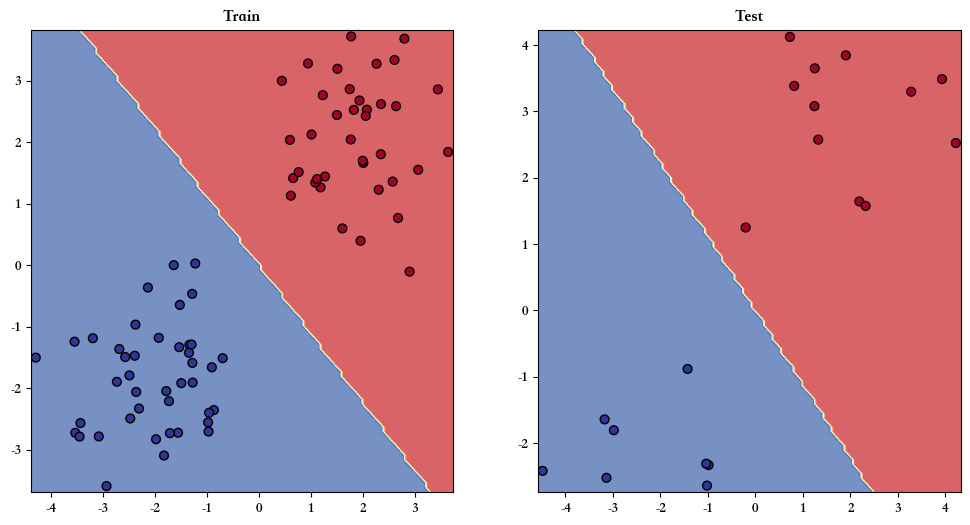

In [30]:
# 结果可视化
plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) 
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()


--- Plotting Metrics Over Epochs ---


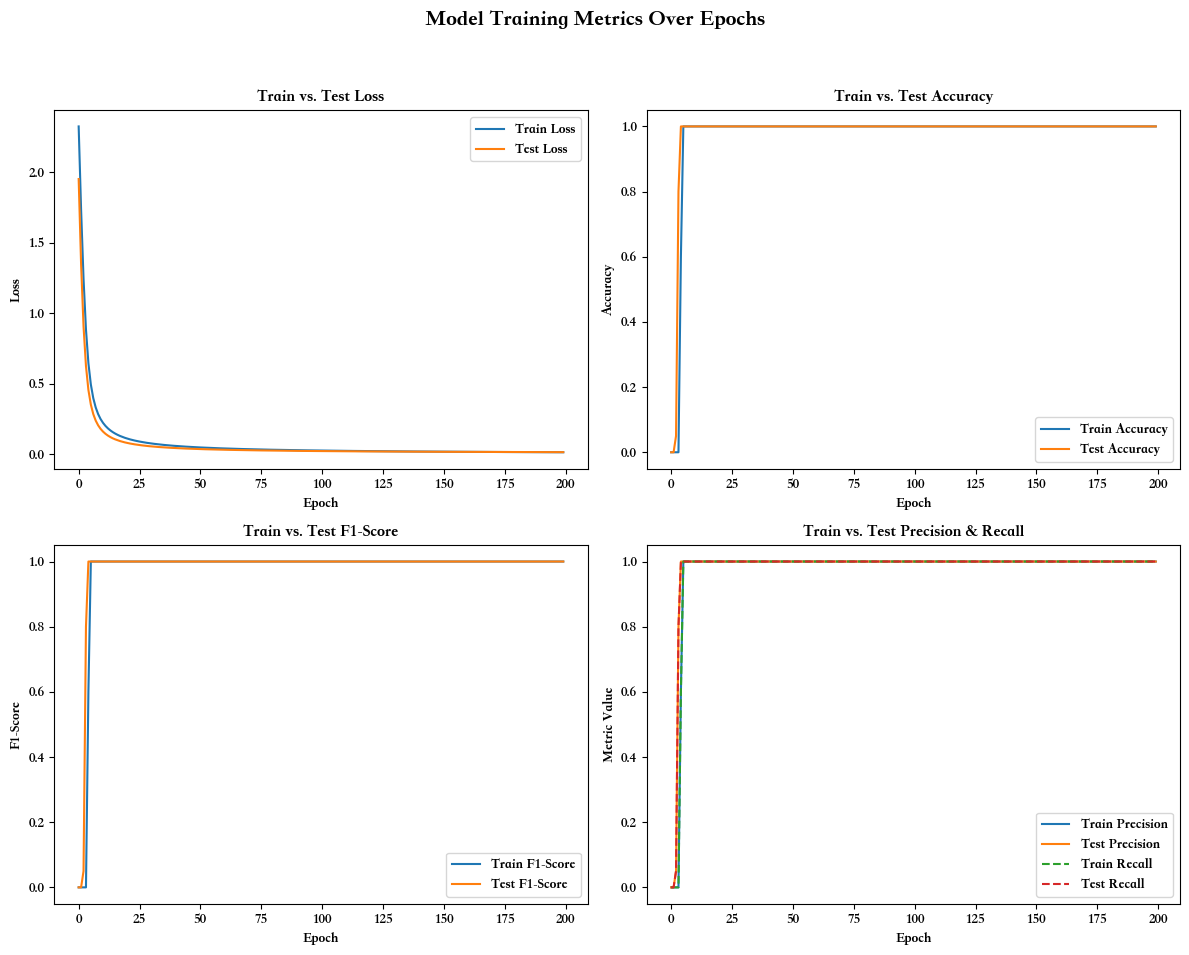

In [31]:
# 绘制指标变化曲线
print("\n--- Plotting Metrics Over Epochs ---")
plt.figure(figsize=(12, 10))

# 绘制损失曲线
plt.subplot(2, 2, 1)
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Train vs. Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# 绘制准确率和F1分数曲线
plt.subplot(2, 2, 2)
plt.plot(epoch_count, train_acc_values, label="Train Accuracy")
plt.plot(epoch_count, test_acc_values, label="Test Accuracy")
plt.title("Train vs. Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# 绘制F1分数曲线
plt.subplot(2, 2, 3)
plt.plot(epoch_count, train_f1_values, label="Train F1-Score")
plt.plot(epoch_count, test_f1_values, label="Test F1-Score")
plt.title("Train vs. Test F1-Score")
plt.xlabel("Epoch")
plt.ylabel("F1-Score")
plt.legend()

# 绘制Precision 和 Recall 曲线
plt.subplot(2, 2, 4)
plt.plot(epoch_count, train_precision_values, label="Train Precision")
plt.plot(epoch_count, test_precision_values, label="Test Precision")
plt.plot(epoch_count, train_recall_values, label="Train Recall", linestyle='--')
plt.plot(epoch_count, test_recall_values, label="Test Recall", linestyle='--')
plt.title("Train vs. Test Precision & Recall")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()

plt.suptitle("Model Training Metrics Over Epochs", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

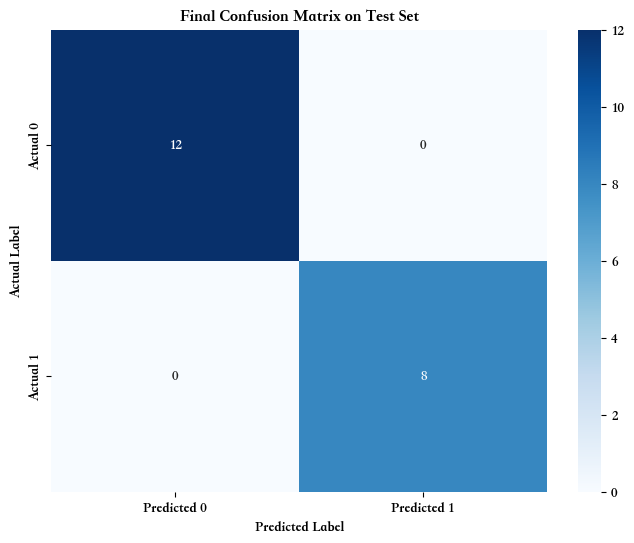

In [32]:
# test_confmat 是在训练循环的最后一个epoch计算得到的
conf_mat_numpy = test_confmat.cpu().numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_numpy, 
            annot=True,     # 在格子里显示数字
            fmt='g',        # 数字格式（'g'表示常规格式）
            cmap='Blues',   # 颜色主题
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Final Confusion Matrix on Test Set")
plt.show()

**结果分析与对比：**

本次训练是由`torch.nn`实现的逻辑回归模型，在人工构造的、线性可分的数据集上进行了训练与评估。

**1.决策边界分析**

- 具有最优线性边界，分类完全正确，泛化能力出色。测试集上的决策边界与训练集上的高度一致，证明模型学习到的分界线能够稳定且有效地应用于从未见过的新数据。

**2.损失函数分析**

- 收敛性极佳，无过拟合现象。根据“Train vs. Test Loss”图表，训练损失和测试损失在同步地平稳地、缓慢地收敛至一个非常接近0的极低水平。模型没有在训练数据上产生过拟合。


**3.评估指标分析**

- 所有关键评估指标，包括准确率、精确率、召回率和F1分数，在训练和测试集上最终都达到了**1.0000**的满分。这代表了理论上的最佳分类性能。所有12个类别0的样本和8个类别1的样本都被正确预测，没有任何混淆。

**4.两种不同模型构造方法的比较**
- 对比 `torch.nn` 与从零开始实现的逻辑回归模型
    -   **从零实现**：需要我们手动创建 `W` 和 `b` 两个张量并编写梯度下降函数。前向传播函数 `torch.matmul(X, W) + b` 也需要手动编写。适合实现简单的逻辑回归。
    -   **`torch.nn` 实现**：参数的创建、初始化以及梯度的设置全部被封装在 `nn.Linear` 模块内部。适合构造复杂的网络。


### 4.3 Softmax 回归实验

**题目 1：要求动手从0实现softmax回归（只借助Tensor和Numpy相关的库）在Fashion-MNIST数据集上进行训练和测试，并从loss、训练集以及测试集上的准确率等多个角度对结果进行分析（要求从零实现交叉熵损失函数）。**

In [33]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [34]:
#---1. 准备数据-----------------------------------------------

#加载 Fashion-MNIST数据集并采用已划分好的训练集与测试集
fashion_train_data = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())

fashion_test_data = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

print(f"训练集样本数: {len(fashion_train_data)}")
print(f"测试集样本数: {len(fashion_test_data)}")
fashion_train_data[0][0].shape

训练集样本数: 60000
测试集样本数: 10000


torch.Size([1, 28, 28])

In [35]:
#通过DataLoader读取小批量数据样本
batch_size = 256
train_loader = torch.utils.data.DataLoader(
    dataset=fashion_train_data,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=fashion_test_data,
    batch_size=batch_size,
    shuffle=False
)

print(f"成功创建 DataLoader,每个批次大小为: {batch_size}")

成功创建 DataLoader,每个批次大小为: 256


一个批次的图像数据形状: torch.Size([256, 1, 28, 28])
一个批次的标签数据形状: torch.Size([256])

所有类别名称: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


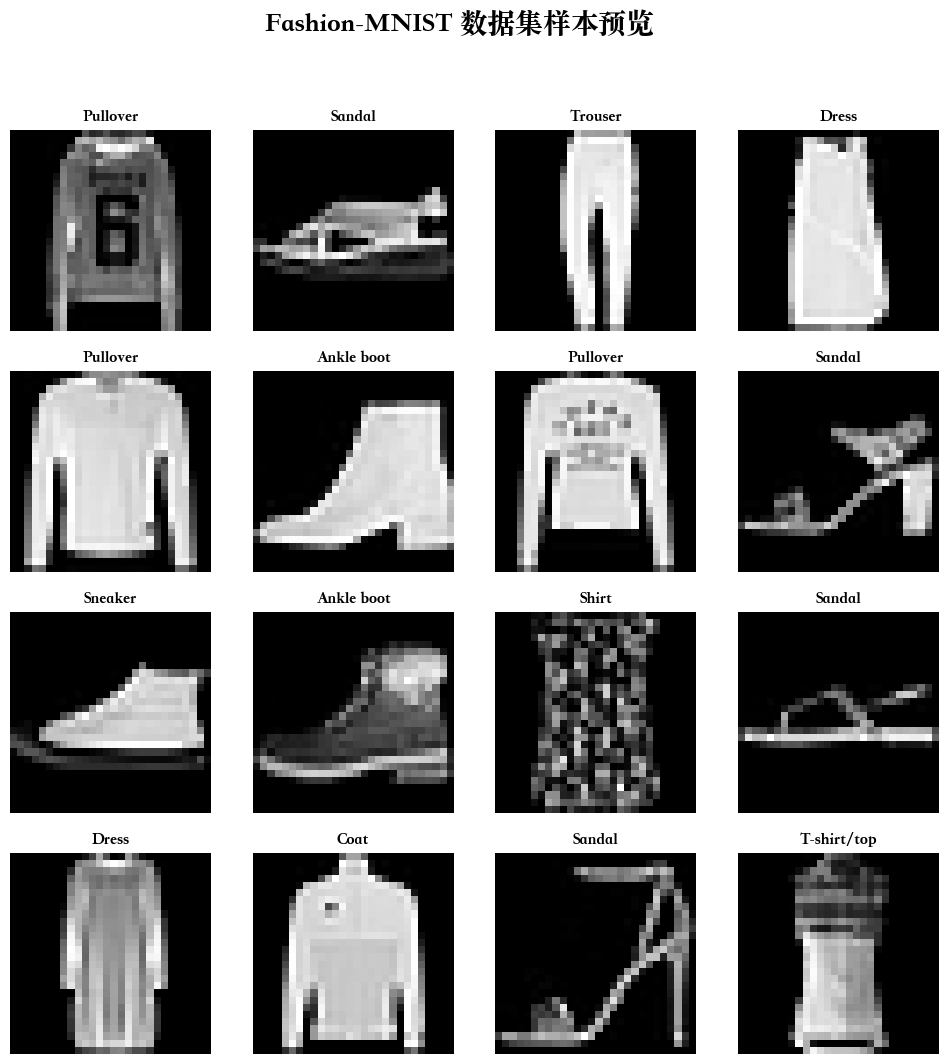

In [ ]:
# 可视化数据集
# 从数据加载器中获取一个批次的数据
images, labels = next(iter(train_loader))

# 打印这一个批次的数据形状
print(f"一个批次的图像数据形状: {images.shape}") # 应该是 [256, 1, 28, 28]
print(f"一个批次的标签数据形状: {labels.shape}")   # 应该是 [256]

class_names = fashion_train_data.classes
print(f"\n所有类别名称: {class_names}")

plt.figure(figsize=(12, 12))
plt.suptitle("Fashion-MNIST 数据集样本预览", fontsize=20)

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

In [37]:
#---2. 创建模型-----------------------------------------------

class SoftmaxRegression:
    def __init__(self, input_features, num_classes, device='mps'):
        self.device = device
        
        self.W = torch.randn(input_features, num_classes, requires_grad=True, device=self.device)
        
        self.b = torch.zeros(num_classes, requires_grad=True, device=self.device)

    def forward(self, x):
        x_flattened = x.view(x.shape[0], -1).to(self.device)
        
        logits = torch.matmul(x_flattened, self.W) + self.b
        return logits

    def __repr__(self):
        return f"SoftmaxRegression(\n  (weight): Parameter with shape {self.W.shape}\n  (bias): Parameter with shape {self.b.shape}\n)"

In [38]:
# 定义损失函数和评估指标
def cross_entropy_loss_manual(logits, y_true):
    num_samples = len(logits)
    
    max_logits = torch.max(logits, dim=1, keepdim=True).values
    exps = torch.exp(logits - max_logits)
    softmax_probs = exps / torch.sum(exps, dim=1, keepdim=True)
    
    
    log_probs = torch.log(softmax_probs + 1e-9)
    loss = -log_probs[range(num_samples), y_true].mean()
    
    return loss

def accuracy_manual(logits, y_true):
    predicted_class = torch.argmax(logits, dim=1)
    return (predicted_class == y_true.to(predicted_class.device)).float().mean().item()

In [39]:
# 定义超参数和计算设备 
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f"\nUsing device: {device}")

INPUT_FEATURES = 28 * 28
NUM_CLASSES = len(class_names)
lr = 0.1
epochs = 100

#实例化 SoftmaxRegression 模型
torch.manual_seed(42) 
model_softmax = SoftmaxRegression(INPUT_FEATURES, NUM_CLASSES, device=device)
print(model_softmax)

params_to_optimize = [model_softmax.W, model_softmax.b]

optimizer = torch.optim.SGD(params=params_to_optimize, lr=lr)

#---3. 训练模型-----------------------------------------------

# 创建列表来存储每个epoch的历史记录，方便后续绘图
train_loss_history = []
test_loss_history = []
train_acc_history = []
test_acc_history = []

for epoch in range(epochs):
    # --- 训练阶段 ---
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device) # 将数据移动到指定设备
        
        # 1. 前向传播
        y_logits = model_softmax.forward(X)
        
        # 2. 计算损失和准确率
        loss = cross_entropy_loss_manual(y_logits, y)
        acc = accuracy_manual(y_logits, y)
        train_loss += loss.item()
        train_acc += acc
        
        # 3. 梯度清零 
        optimizer.zero_grad()

        # 4. 反向传播 
        loss.backward()

        # 5. 更新参数 
        optimizer.step()

    # 计算当前 epoch 的平均训练损失和准确率
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    
    # --- 测试阶段 ---
    test_loss, test_acc = 0, 0
    with torch.no_grad(): # 测试时不需要计算梯度
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_logits = model_softmax.forward(X_test)
            test_loss += cross_entropy_loss_manual(test_logits, y_test).item()
            test_acc += accuracy_manual(test_logits, y_test)
            
    # 计算当前 epoch 的平均测试损失和准确率
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    test_loss_history.append(test_loss)
    test_acc_history.append(test_acc)
    
    # --- 打印当前epoch的结果 ---
    if (epoch+1) % 10 == 0:
        print(
            f"Epoch: {epoch+1:2d} | "
            f"Train Loss: {train_loss:.4f} | "
            f"Train Acc: {train_acc*100:.2f}% | "
            f"Test Loss: {test_loss:.4f} | "
            f"Test Acc: {test_acc*100:.2f}%"
        )


Using device: mps
SoftmaxRegression(
  (weight): Parameter with shape torch.Size([784, 10])
  (bias): Parameter with shape torch.Size([10])
)
Epoch: 10 | Train Loss: 1.0390 | Train Acc: 76.33% | Test Loss: 1.0868 | Test Acc: 76.14%
Epoch: 20 | Train Loss: 0.8148 | Train Acc: 79.36% | Test Loss: 0.8782 | Test Acc: 78.29%
Epoch: 30 | Train Loss: 0.7111 | Train Acc: 80.79% | Test Loss: 0.7859 | Test Acc: 79.43%
Epoch: 40 | Train Loss: 0.6486 | Train Acc: 81.75% | Test Loss: 0.7276 | Test Acc: 79.97%
Epoch: 50 | Train Loss: 0.6058 | Train Acc: 82.30% | Test Loss: 0.6894 | Test Acc: 80.27%
Epoch: 60 | Train Loss: 0.5755 | Train Acc: 82.75% | Test Loss: 0.6555 | Test Acc: 80.92%
Epoch: 70 | Train Loss: 0.5496 | Train Acc: 83.21% | Test Loss: 0.6283 | Test Acc: 81.45%
Epoch: 80 | Train Loss: 0.5296 | Train Acc: 83.56% | Test Loss: 0.6203 | Test Acc: 81.61%
Epoch: 90 | Train Loss: 0.5134 | Train Acc: 83.98% | Test Loss: 0.6152 | Test Acc: 80.83%
Epoch: 100 | Train Loss: 0.4996 | Train Acc: 84

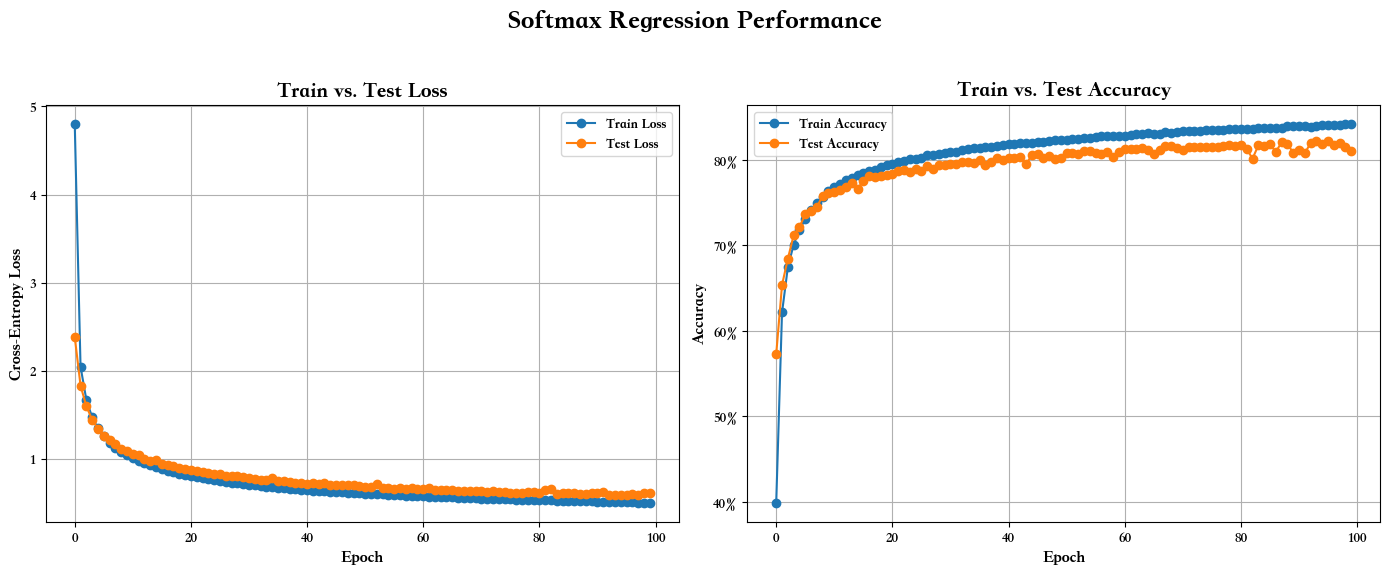

In [40]:
#---4. 模型结果可视化-----------------------------------------------

plt.figure(figsize=(14, 6))
# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss_history, label="Train Loss", marker='o')
plt.plot(range(epochs), test_loss_history, label="Test Loss", marker='o')
plt.title("Train vs. Test Loss", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Cross-Entropy Loss", fontsize=12)
plt.legend()
plt.grid(True)

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_acc_history, label="Train Accuracy", marker='o')
plt.plot(range(epochs), test_acc_history, label="Test Accuracy", marker='o')
plt.title("Train vs. Test Accuracy", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(True)
# 将y轴格式化为百分比显示
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

plt.suptitle("Softmax Regression Performance", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


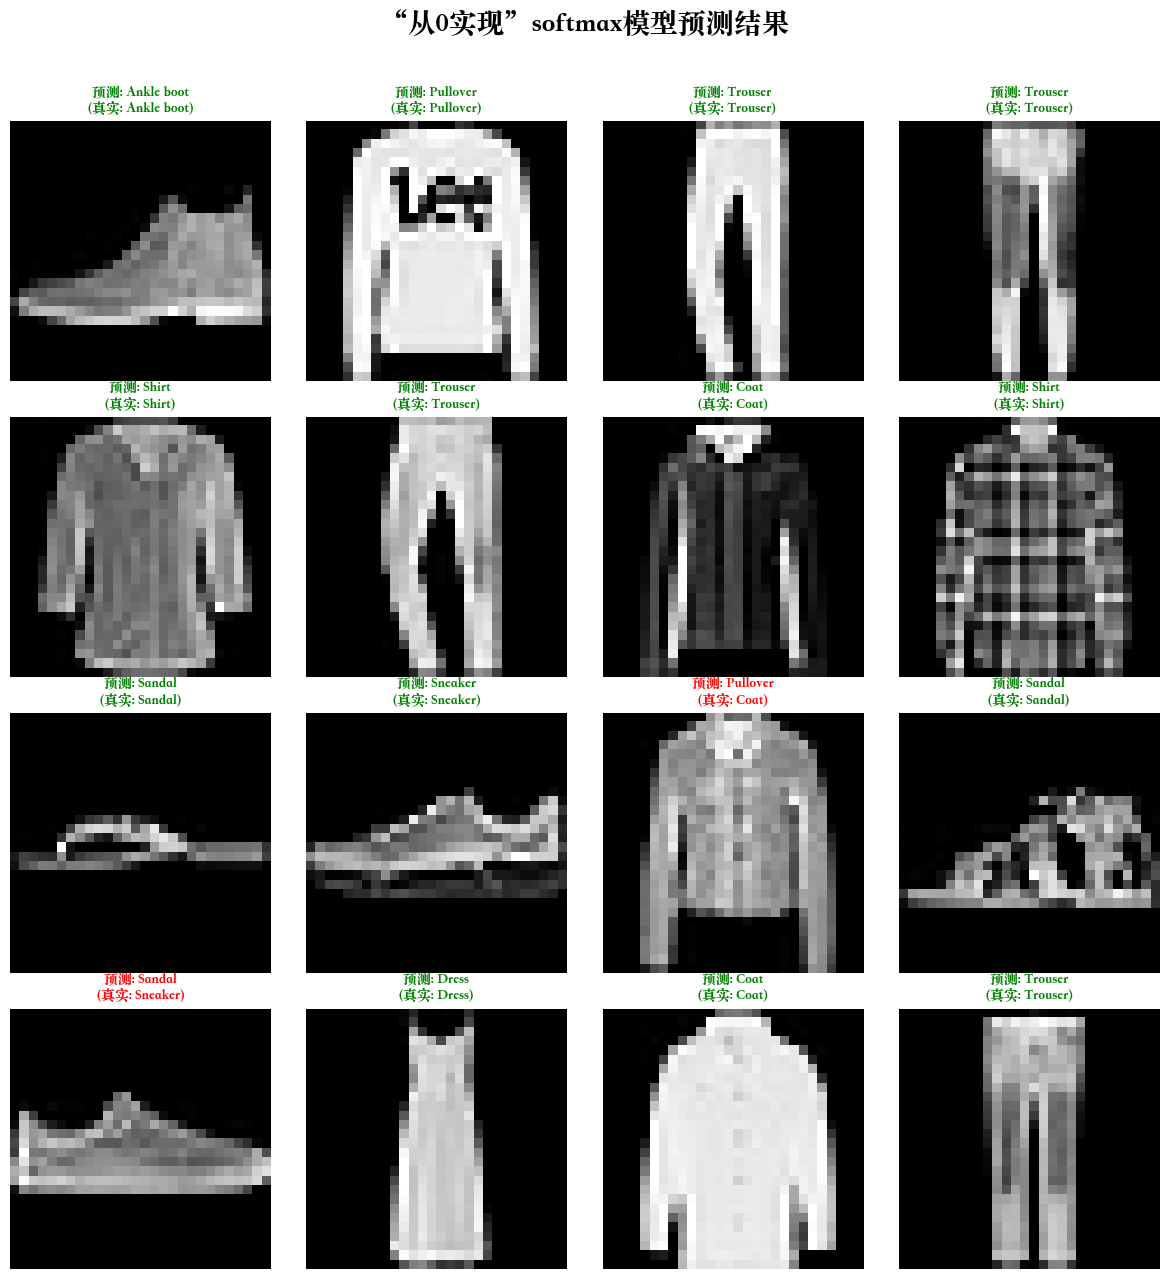

In [41]:
# 从测试数据加载器中获取一个批次的数据
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    y_logits = model_softmax.forward(images)

# 将 logits 转换为预测标签
y_preds = torch.argmax(y_logits, dim=1)
num_images_to_show = 16 

plt.figure(figsize=(12, 13))
plt.suptitle("“从0实现”softmax模型预测结果", fontsize=20)

for i in range(num_images_to_show):
    plt.subplot(4, 4, i + 1)
    
    # 获取第 i 张图片、预测标签和真实标签
    image = images[i]
    pred_label = y_preds[i].item()
    true_label = labels[i].item()
    
    # 获取类别名称
    pred_name = class_names[pred_label]
    true_name = class_names[true_label]
    
    # 判断预测是否正确，并设置标题颜色
    is_correct = (pred_label == true_label)
    title_color = "green" if is_correct else "red"
    
    # 显示图片
    plt.imshow(image.cpu().squeeze(), cmap="gray")
    
    # 设置标题
    plt.title(f"预测: {pred_name}\n(真实: {true_name})", color=title_color, fontsize=10)
    
    # 不显示坐标轴
    plt.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**结果分析**

本次实验构建了一个从零实现的、单层的Softmax回归模型，用于处理多分类任务（如Fashion-MNIST数据集）。该模型包含 输入 -> 线性变换 (Wx+b) -> Softmax激活 -> 输出 的基本流程。从提供的图表来看，模型的训练结果整体表现**良好**，成功学习到了数据中的部分规律。

**1. 预测结果定性分析**

- 从“softmax模型预测结果”图可以看出，模型在大部分测试样本上都做出了正确的预测（以绿色字体显示），例如能够准确区分类别。
- 同时，模型也出现了一些分类错误（以红色字体显示）。这些错误通常发生在视觉上较为相似的类别之间，这对于一个简单的线性模型来说是符合预期的，说明模型主要学习了较为宽泛和基础的特征。

**2. 损失函数分析**

- **收敛性良好，但有轻微过拟合迹象**。从“Train vs. Test Loss”图可以看出，训练损失和测试损失在训练初期都迅速下降，，在训练后期（约70个epoch后），测试损失趋于平稳甚至有轻微上升的趋势，导致在测试集上的泛化能力停止提升。

**3. 评估指标分析**

- **收敛迅速，准确率符合预期**。从“Train vs. Test Accuracy”图可以看出，模型的准确率在最初的20个epoch内快速提升，随后增长放缓，并最终趋于稳定。训练准确率最终稳定在约85%左右，而测试准确率则稳定在**82%**左右。测试准确率略低于训练准确率，这与损失函数曲线反映出的轻微过拟合现象相符。对于一个简单的单层线性模型而言，在Fashion-MNIST这样的非线性可分数据集上达到82%的准确率是一个**合理且不错**的结果。

**题目 2：利用torch.nn实现Softmax回归在Fashion-MNIST数据集上进行训练和测试，并从loss、训练集以及测试集上的准确率等多个角度对结果进行分析。**

In [42]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [43]:
#---1. 准备数据-----------------------------------------------

#加载 Fashion-MNIST数据集并采用已划分好的训练集与测试集
fashion_train_data = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())

fashion_test_data = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

print(f"训练集样本数: {len(fashion_train_data)}")
print(f"测试集样本数: {len(fashion_test_data)}")

训练集样本数: 60000
测试集样本数: 10000


In [44]:
#通过DataLoader读取小批量数据样本
batch_size = 256
train_loader = torch.utils.data.DataLoader(
    dataset=fashion_train_data,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=fashion_test_data,
    batch_size=batch_size,
    shuffle=False
)

print(f"\n成功创建 DataLoader,每个批次大小为: {batch_size}")


成功创建 DataLoader,每个批次大小为: 256



一个批次的图像数据形状: torch.Size([256, 1, 28, 28])
一个批次的标签数据形状: torch.Size([256])

所有类别名称: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


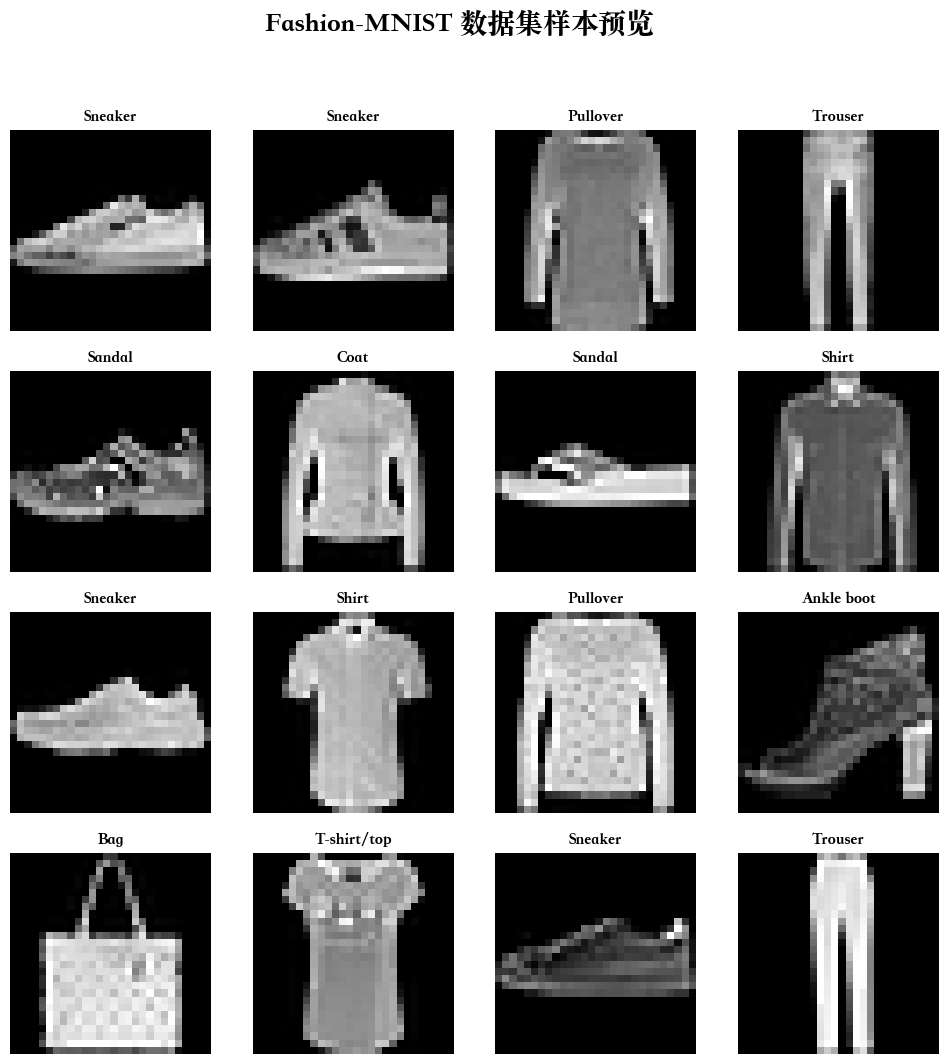

In [45]:
# 可视化数据集
# 从数据加载器中获取一个批次的数据
images, labels = next(iter(train_loader))

# 打印这一个批次的数据形状
print(f"\n一个批次的图像数据形状: {images.shape}") # 应该是 [256, 1, 28, 28]
print(f"一个批次的标签数据形状: {labels.shape}")   # 应该是 [256]

class_names = fashion_train_data.classes
print(f"\n所有类别名称: {class_names}")

plt.figure(figsize=(12, 12))
plt.suptitle("Fashion-MNIST 数据集样本预览", fontsize=20)

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

In [46]:
#---2. 创建模型----------------------------------------------

from torch import nn

class SoftmaxRegressionNN(nn.Module):
    def __init__(self, input_features, num_classes):
        super().__init__() 
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # 第一步：将 [batch, 1, 28, 28] 的图像拉平为 [batch, 784]
            nn.Linear(in_features=input_features, out_features=num_classes) # 第二步：应用线性变换
        )

    def forward(self, x):
        return self.layer_stack(x)

In [47]:
# 定义损失函数和评估指标
def accuracy_manual(logits, y_true):
    predicted_class = torch.argmax(logits, dim=1)
    return (predicted_class == y_true).float().mean().item()

# 定义超参数和计算设备 
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f"\nUsing device: {device}")

INPUT_FEATURES = 28 * 28
NUM_CLASSES = len(class_names)
lr = 0.1
epochs = 50

# 实例化模型、损失函数和优化器 
torch.manual_seed(42)
model_nn = SoftmaxRegressionNN(INPUT_FEATURES, NUM_CLASSES).to(device)
print("\n已创建模型:")
print(model_nn)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_nn.parameters(), lr=lr)


Using device: mps

已创建模型:
SoftmaxRegressionNN(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)


In [48]:
#---3. 训练模型----------------------------------------------
train_loss_history = []
test_loss_history = []
train_acc_history = []
test_acc_history = []

for epoch in range(epochs):
    # --- 训练阶段 ---
    model_nn.train() # 将模型设置为训练模式
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        
        # 1. 前向传播
        y_logits = model_nn(X)
        
        # 2. 计算损失
        loss = loss_fn(y_logits, y)
        acc = accuracy_manual(y_logits, y)
        train_loss += loss.item()
        train_acc += acc
        
        # 3. 优化器梯度清零
        optimizer.zero_grad()
            
        # 4. 反向传播
        loss.backward()
        
        # 5. 优化器更新参数
        optimizer.step()

    # 计算平均指标
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    
    # --- 测试阶段 ---
    model_nn.eval() # 将模型设置为评估模式
    test_loss, test_acc = 0, 0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_logits = model_nn(X_test)
            test_loss += loss_fn(test_logits, y_test).item()
            test_acc += accuracy_manual(test_logits, y_test)
            
    # 计算平均指标
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    test_loss_history.append(test_loss)
    test_acc_history.append(test_acc)
    
    # --- 打印结果 ---
    if (epoch+1) % 10 == 0:
        print(
            f"Epoch: {epoch+1:2d} | "
            f"Train Loss: {train_loss:.4f} | "
            f"Train Acc: {train_acc*100:.2f}% | "
            f"Test Loss: {test_loss:.4f} | "
            f"Test Acc: {test_acc*100:.2f}%"
    )

Epoch: 10 | Train Loss: 0.4478 | Train Acc: 84.86% | Test Loss: 0.4785 | Test Acc: 83.27%
Epoch: 20 | Train Loss: 0.4197 | Train Acc: 85.65% | Test Loss: 0.4613 | Test Acc: 83.88%
Epoch: 30 | Train Loss: 0.4080 | Train Acc: 86.11% | Test Loss: 0.4697 | Test Acc: 82.93%
Epoch: 40 | Train Loss: 0.4001 | Train Acc: 86.36% | Test Loss: 0.4457 | Test Acc: 84.14%
Epoch: 50 | Train Loss: 0.3950 | Train Acc: 86.47% | Test Loss: 0.4456 | Test Acc: 84.50%


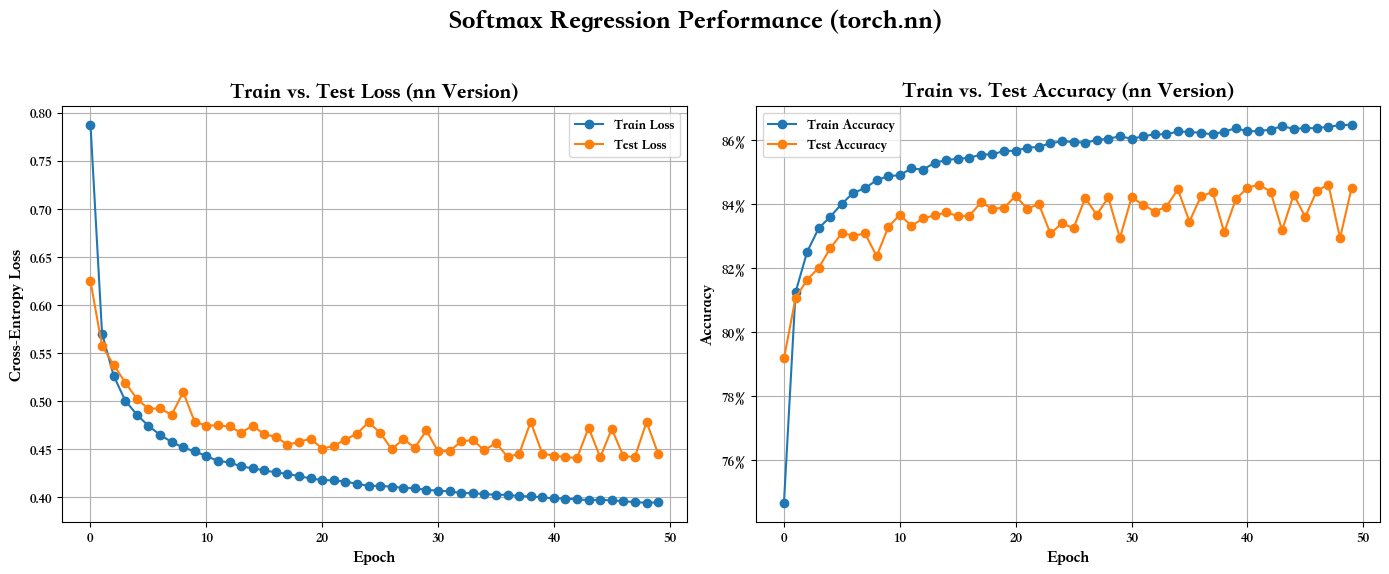

In [49]:
#---4. 模型可视化----------------------------------------------

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss_history, label="Train Loss", marker='o')
plt.plot(range(epochs), test_loss_history, label="Test Loss", marker='o')
plt.title("Train vs. Test Loss (nn Version)", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Cross-Entropy Loss", fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_acc_history, label="Train Accuracy", marker='o')
plt.plot(range(epochs), test_acc_history, label="Test Accuracy", marker='o')
plt.title("Train vs. Test Accuracy (nn Version)", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

plt.suptitle("Softmax Regression Performance (torch.nn)", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

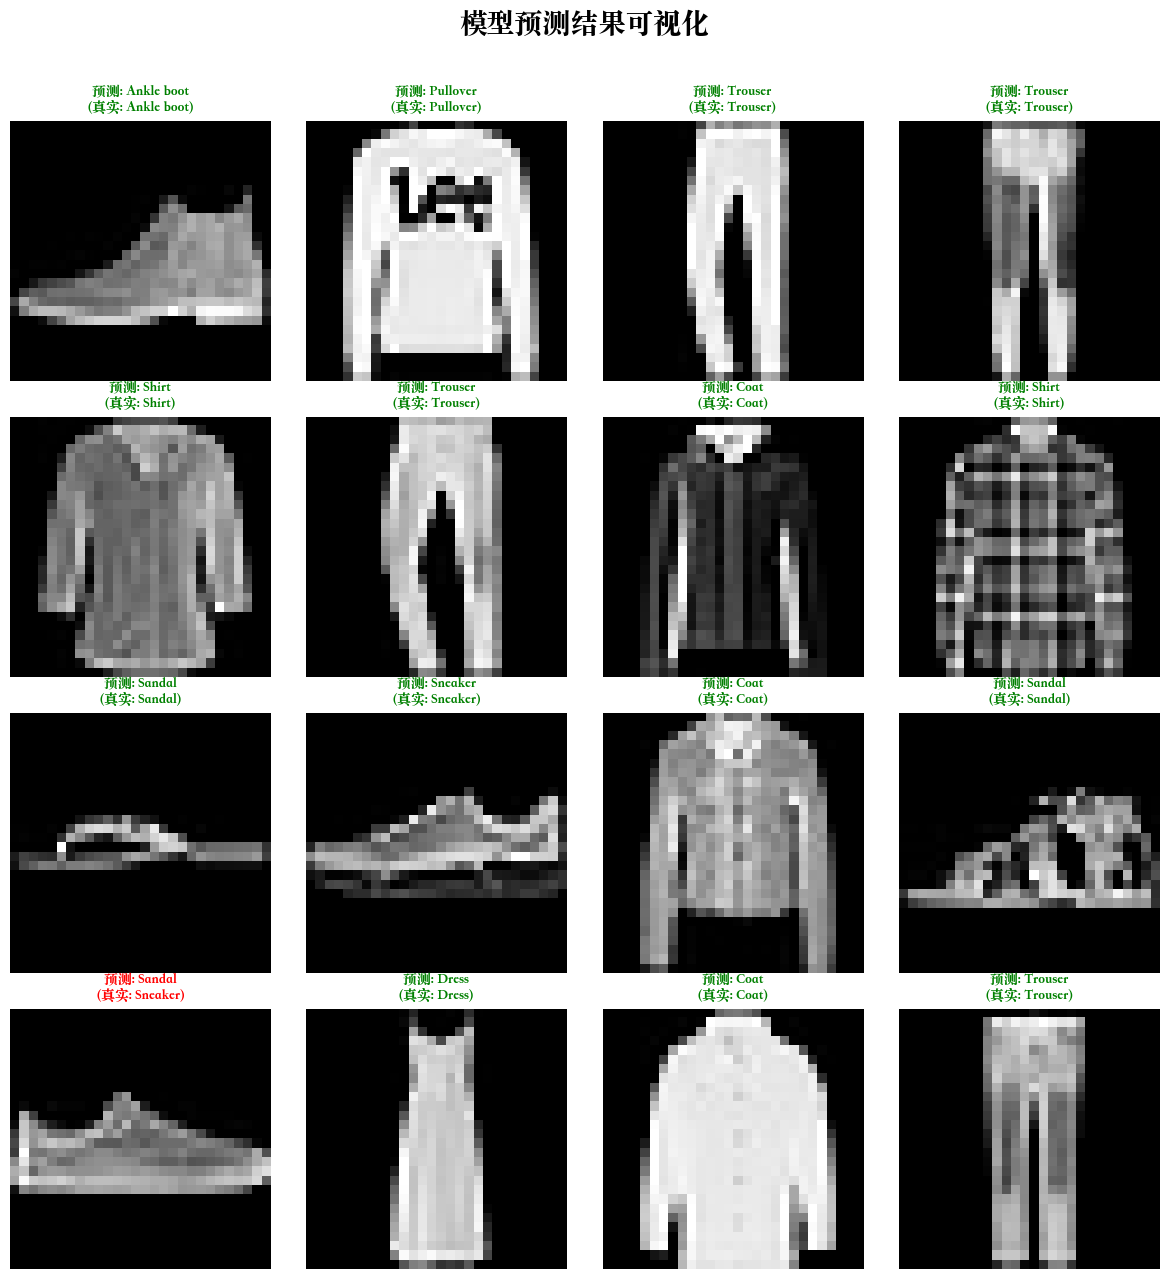

In [50]:
# 确保模型处于评估模式
model_nn.eval()

# 从测试数据加载器中获取一个批次的数据
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# 使用模型进行预测
with torch.no_grad():
    y_logits = model_nn(images)

# 将 logits 转换为预测标签
y_preds = torch.argmax(y_logits, dim=1)


# --- 开始可视化预测结果 ---
# 设置要展示的图片数量
num_images_to_show = 16 

plt.figure(figsize=(12, 13))
plt.suptitle("模型预测结果可视化", fontsize=20)

for i in range(num_images_to_show):
    plt.subplot(4, 4, i + 1)
    
    # 获取第 i 张图片、预测标签和真实标签
    image = images[i]
    pred_label = y_preds[i].item()
    true_label = labels[i].item()
    
    # 获取类别名称
    pred_name = class_names[pred_label]
    true_name = class_names[true_label]
    
    # 判断预测是否正确，并设置标题颜色
    is_correct = (pred_label == true_label)
    title_color = "green" if is_correct else "red"
    
    # 显示图片
    plt.imshow(image.cpu().squeeze(), cmap="gray")
    
    # 设置标题
    plt.title(f"预测: {pred_name}\n(真实: {true_name})", color=title_color, fontsize=10)
    
    # 不显示坐标轴
    plt.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**结果分析与对比：**

使用 PyTorch 内置的 `torch.nn` 模块实现的Softmax回归模型，在Fashion-MNIST数据集上进行了训练与评估。

**1. 预测结果定性分析**

- **模型表现良好**。从“模型预测结果可视化”图来看，`torch.nn`版本能准确识别绝大多数衣物类别，但也会在一些视觉上易混淆的类别上出现错误。

**2. 损失函数分析**

- **训练过程稳定，但测试过程波动较大**。根据“Train vs. Test Loss (nn Version)”图表，训练损失平滑且持续下降，表明模型在训练集上稳定学习。测试损失表现出**非常明显的抖动和不稳定性**。尽管存在波动，但测试损失的总体水平没有持续上升，因此**没有出现严重的过拟合现象**。

**3. 评估指标分析**

- **最终准确率略有提升**。`torch.nn`版本的训练准确率最终达到了约**86.5%**，测试准确率则在**83%-84%**的区间内波动。

**4. 两种不同模型构造方法的比较**

- 对比 `torch.nn` 与从零开始实现的Softmax回归模型：
    -   **从零实现**：需要我们手动创建权重 `W` 和偏置 `b` 两个张量，并确保它们能被梯度追踪。前向传播函数 `X @ W + b` 以及优化步骤都需要我们亲手搭建。
    -   **`torch.nn` 实现**：全部被封装在 `nn.Linear` 模块内部，是构建任何复杂网络的标准方法，具有极佳的封装性、可扩展性和可维护性。

## 五、实验心得体会
&emsp;&emsp;通过本次实验，我系统地体验了“从零实现”和使用`torch.nn`高级API两种不同方式来构建逻辑回归和Softmax回归模型。这个对比和实践的过程，极大地加深了我对PyTorch乃至深度学习工作流程的理解。

&emsp;&emsp;从0开始实现模型的过程，让我对理论知识有了更深刻的认识。权重`W`、偏置`b`、损失函数、梯度下降等概念，通过手动创建每一个张量，编写前向传播的矩阵运算，并依据`loss.backward()`计算出的梯度来执行`W -= lr * W.grad`这一核心更新步骤时，我清晰地看到了数据在模型内部的流动轨迹和参数优化的每一个细节。

&emsp;&emsp;`nn.Linear`一个模块就封装了参数的创建、初始化和线性变换；`nn.CrossEntropyLoss`一个函数就集成了Softmax激活和损失计算，并能处理数值稳定性问题；`torch.optim`优化器则让复杂的参数更新变得仅需一行`optimizer.step()`。

&emsp;&emsp;同时，本次实验也让我感受到了数据可视化的重要性。将训练过程中的损失和准确率变化绘制成图像后，模型的性能表现便一目了然。我可以通过观察曲线的走势及决策边界、图形识别结果，直观地判断模型是否收敛、模型训练结果、学习速度的快慢。
